In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Arial",
    "font.size": "6",
    "legend.loc": "upper left"
})

import warnings
warnings.filterwarnings("ignore")

# Evaluation of gauss_restraints Simulation Run

## 1. Number of runs
Comparison of one single REMC with largest cluster against all clustering including all runs. At threshold $3.5 A$ and cluster $1$.

/var/folders/fp/bsfxxqbj7wj99b1_1hbdy5dh0000gn/T/ipykernel_19637/2815862038.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev2["RNA"] = ev2["RNA"].apply(rem_suff)
/var/folders/fp/bsfxxqbj7wj99b1_1hbdy5dh0000gn/T/ipykernel_19637/2815862038.py:37: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  single = float(group_RNA[group_RNA["Clustering File"] == "big"].RMSD)
/var/folders/fp/bsfxxqbj7wj99b1_1hbdy5dh0000gn/T/ipykernel_19637/2815862038.py:38: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  all = float(group_RNA[group_RNA["Clustering File"] == "gauss"

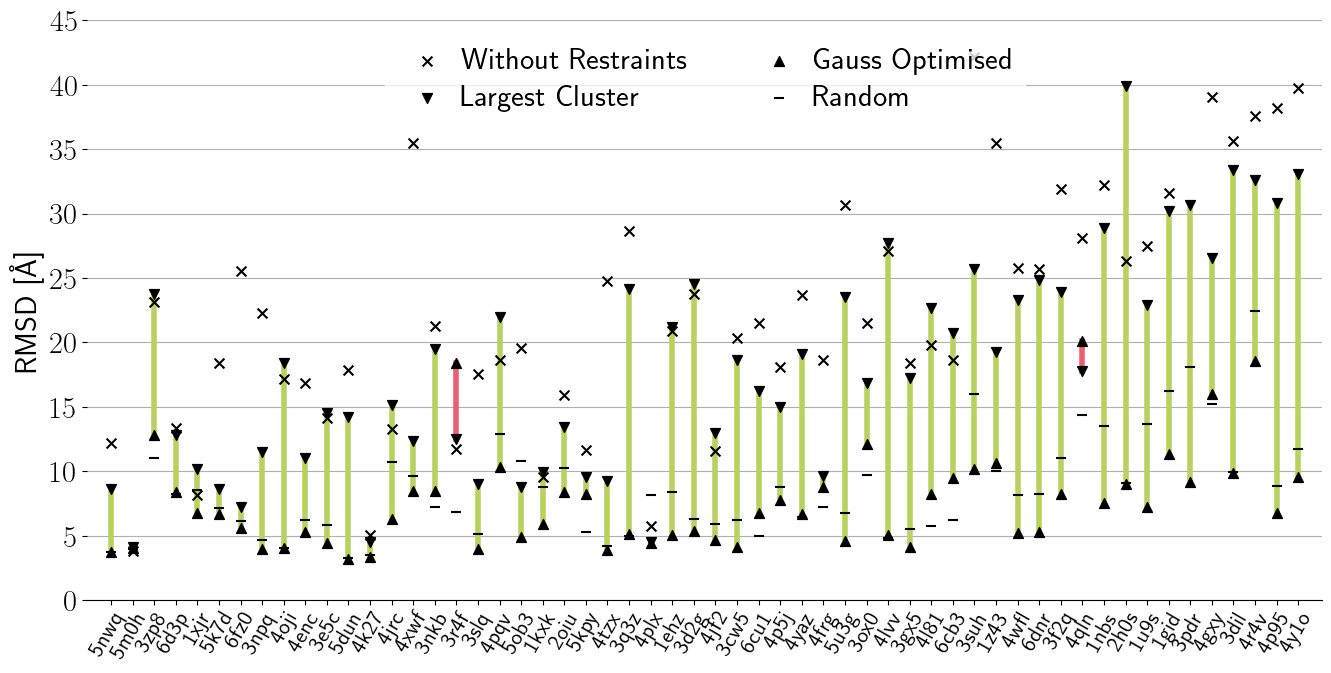

In [39]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
matplotlib.rc('font', family='sans-serif') 
matplotlib.rc('font', serif='Helvetica Neue') 
matplotlib.rcParams.update({'font.size': 22})
plt.rcParams.update({
    "text.usetex": True,
    "legend.loc": "upper center"
})

df = pd.read_csv("results.csv", index_col=0)
df_without = pd.read_csv("../FinalConfig/results.csv", index_col=0)
ev1 = df[(df["threshold"] == 3.5) & (df["cluster"] == 1)]
ev2 = df_without[(df_without["threshold"] == 3.5) & (df_without["cluster"] == 1)]

rem_suff = lambda mol: mol.strip("_A").strip("_B").strip("_U").strip("_X")

ev1["RNA"] = ev1["RNA"].apply(rem_suff)
ev2["RNA"] = ev2["RNA"].apply(rem_suff)

cm = 1/2.54
fig, ax = plt.subplots(figsize=(35*cm, 18*cm))

tot = 0
ax.grid(axis="y")
ax.set_axisbelow(True)

mark_size = 50
ax.scatter(ev2[ev2["Clustering File"] == "singleA"].sort_values(by="size").RNA, ev2[ev2["Clustering File"] == "singleA"].sort_values(by="size").RMSD, label=r"Without\ Restraints", marker="x", s=mark_size, color='black', zorder=4)
ax.scatter(ev1[ev1["Clustering File"] == "big"].RNA, ev1[ev1["Clustering File"] == "big"].RMSD, label=r"Largest\ Cluster", marker="v", s=mark_size, color='black', zorder=4)
ax.scatter(ev1[ev1["Clustering File"] == "gauss"].RNA, ev1[ev1["Clustering File"] == "gauss"].RMSD, label=r"Gauss\ Optimised", marker="^", s=mark_size, color='black', zorder=4)
ax.scatter(ev1[ev1["Clustering File"] == "rnd"].RNA, ev1[ev1["Clustering File"] == "rnd"].RMSD, label=r"Random", marker="_", s=mark_size, color='black', zorder=4)


for name, group_RNA in ev1.sort_values(by="size").groupby("RNA", sort=False):
    single = float(group_RNA[group_RNA["Clustering File"] == "big"].RMSD)
    all = float(group_RNA[group_RNA["Clustering File"] == "gauss"].RMSD)
    diff = single - all
    tot += diff
    c = (185/255, 210/255, 95/255) if diff > 0 else (235/255, 95/255, 115/255)
    ax.plot((name, name),(single, all), linewidth=4, color=c, zorder=3)


ax.legend(ncol=2, bbox_to_anchor=(0.5, 1), labelspacing=0.3, handletextpad=0.1).get_frame().set_color("white")

ax.set_ylabel(r"RMSD [\AA]")
ax.set_ylim(0, 45)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.tick_params('x', labelsize=16)

plt.setp(ax.get_xticklabels(), rotation=60, ha="right", rotation_mode="anchor")

plt.margins(x=0.02)
plt.tight_layout()
#plt.show()
plt.savefig("/Users/cfaber/sciebo/Promotion/Tagungen/2024/BPS/topology.png", dpi=300, transparent=True)
#plt.savefig("../Plots/con_distr.png", dpi=300, transparent=True)

Looking at the two outliers:

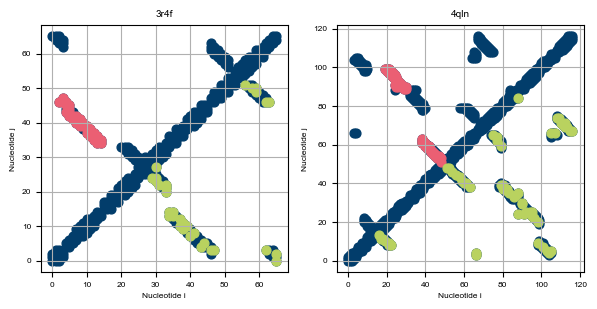

In [22]:
from BioHelpers_FABER.cmap import Cmap
from BioHelpers_FABER.bio_mod import arr_to_contact_list
import matplotlib.pyplot as plt

mol_3r4f = Cmap()
mol_3r4f.load_native_pdb(filename="../../RNA_Testset/PDB/3r4f.pdb", id="3r4f")
mol_3r4f.load_contacts_from_restraints(filename="res_clusterDense/3r4f.res", contact_name="Cluster")
mol_3r4f.load_contacts_from_restraints(filename="res_gauss/3r4f.res", contact_name="Gauss")
mol_4qln = Cmap()
mol_4qln.load_native_pdb(filename="../../RNA_Testset/PDB/4qln_A.pdb", id="3r4f")
mol_4qln.load_contacts_from_restraints(filename="res_clusterDense/4qln_A.res", contact_name="Cluster")
mol_4qln.load_contacts_from_restraints(filename="res_gauss/4qln_A.res", contact_name="Gauss")

plt.rcParams.update({'font.size': 6})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams["font.sans-serif"] = "Arial"
juelich_colors = ["#eb5f73", "#b9d25f", "#adbde3", "#af82b9", "#023d6b", "#fab45a"]

fig, axs = plt.subplots(1,2,figsize=(7,3.5), frameon=False)
for a in axs:
    a.set_aspect(1)
    a.set_frame_on(True)
    a.grid()
    a.set_xlabel("Nucleotide i")
    a.set_ylabel("Nucleotide j")
native = arr_to_contact_list(mol_3r4f.native_contacts)
cluster = arr_to_contact_list(mol_3r4f.contacts["Cluster"])
gauss = arr_to_contact_list(mol_3r4f.contacts["Gauss"])
axs[0].scatter([e[0] for e in native], [e[1] for e in native], marker='o', s=40, color=(2/255,61/255,107/255))
axs[0].scatter([e[0] for e in cluster], [e[1] for e in cluster], marker='o', s=40, color=juelich_colors[0])
axs[0].scatter([e[1] for e in gauss], [e[0] for e in gauss], marker='o', s=40, color=juelich_colors[1])
native = arr_to_contact_list(mol_4qln.native_contacts)
cluster = arr_to_contact_list(mol_4qln.contacts["Cluster"])
gauss = arr_to_contact_list(mol_4qln.contacts["Gauss"])
axs[1].scatter([e[0] for e in native], [e[1] for e in native], marker='o', s=40, color=(2/255,61/255,107/255))
axs[1].scatter([e[0] for e in cluster], [e[1] for e in cluster], marker='o', s=40, color=juelich_colors[0])
axs[1].scatter([e[1] for e in gauss], [e[0] for e in gauss], marker='o', s=40, color=juelich_colors[1])

axs[0].set_title("3r4f")
axs[1].set_title("4qln")

plt.savefig("si-outliers", dpi=300)
plt.show()
